# Admission numbers vs Key Indicators

See if there are any links between admission numbers to each stroke unit and the number of key indicators that they meet.

__NOTE__: Welsh LSOAs and so stroke units have missing admissions data. They are excluded from this notebook.

In [1]:
import os
import pandas as pd
import numpy as np  # for NaN
import statsmodels.api as sm

In [2]:
from scipy.stats import pearsonr

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

### Import data

In [6]:
dir_files = '../data/organisational_audit/processed'
file_excel = 'processed_2019_portfolio_key_indicators_summary_numeric_shap_admissions.csv'

In [7]:
df = pd.read_csv(os.path.join(dir_files, file_excel))

In [8]:
df.columns

Index(['Hospital names', 'acute_unit', 'bed1', 'bed3', 'ki_total', 'ki1',
       'ki1_nurses6_wte', 'ki1_nurses7_wte', 'ki2', 'ki2_psych_wte', 'ki3',
       'ki3_strokenurse_outofhours', 'ki4',
       'ki4_minimum_nurse_bed1_saturdays10am',
       'ki4_minimum_nurse_bed1_sundays10am',
       'ki4_minimum_nurse_bed3_saturdays10am',
       'ki4_minimum_nurse_bed3_sundays10am', 'ki5',
       'ki5_occupationaltherapy_7days', 'ki5_physiotherapy_7days',
       'ki5_speechlanguagetherapy_7days', 'ki6', 'ki6_prealert_consultant',
       'ki6_prealert_fastpositive_sometimes', 'ki6_prealert_fastpositive_yes',
       'ki6_prealert_ivtcandidates_sometimes',
       'ki6_prealert_ivtcandidates_yes', 'ki6_prealert_juniordoctor',
       'ki6_prealert_othersuspectedstroke_sometimes',
       'ki6_prealert_othersuspectedstroke_yes', 'ki6_prealert_strokenurse',
       'ki7', 'ki7_percent_access_to_stroke_esd_team', 'ki7_stroke_esd_team',
       'ki8', 'ki8_patientcarersurvey_frequency_1to2peryear',
      

## Stats

### Admissions distributions

In [9]:
# dropna() to remove Wales missing data.
admissions = df['admissions'].copy().dropna().values

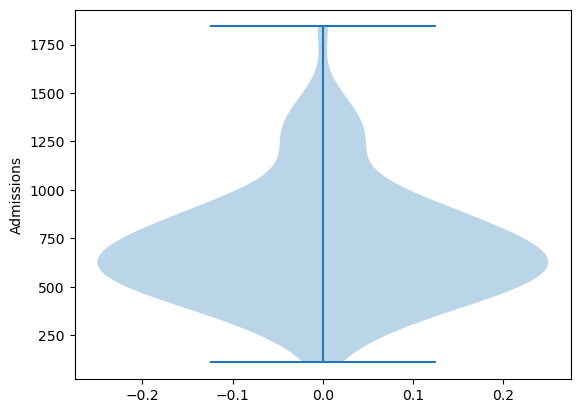

In [10]:
fig, ax = plt.subplots()

ax.violinplot(admissions, positions=[0])

ax.set_ylabel('Admissions')

plt.savefig('./images/violin_admissions.png', bbox_inches='tight')
plt.show()

### Admissions vs SHAP vs Key Indicators

Make scatter plots of various combinations of:
+ Total Key Indicators met
+ SHAP value
+ Admissions

In [11]:
# Shorten the names of the main sources of information:
x = df['ki_total'].values
y = df['shap_mean'].values
c = df['admissions'].values

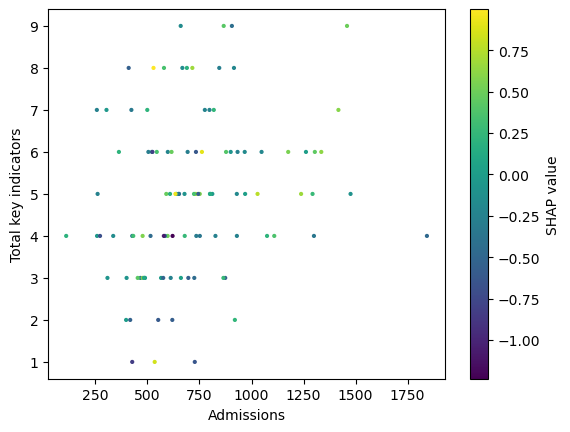

In [12]:
fig, ax = plt.subplots()

sca = ax.scatter(c, x, c=y, s=4)
plt.colorbar(sca, label='SHAP value')

ax.set_ylabel('Total key indicators')
ax.set_xlabel('Admissions')

plt.savefig('./images/scatter_admissions_ki.png', bbox_inches='tight')
plt.show()

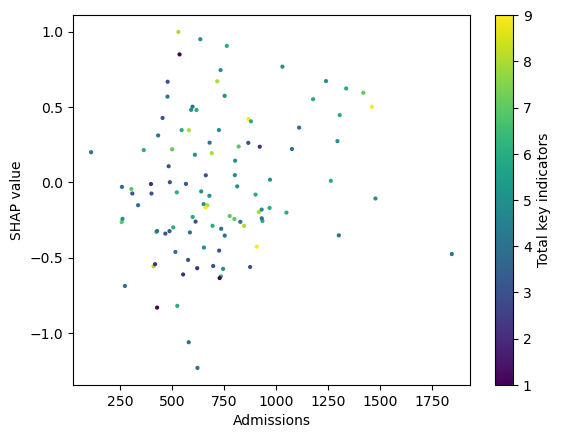

In [13]:
fig, ax = plt.subplots()

sca = ax.scatter(c, y, c=x, s=4)
plt.colorbar(sca, label='Total key indicators')

ax.set_ylabel('SHAP value')
ax.set_xlabel('Admissions')

plt.savefig('./images/scatter_admissions_shap.png', bbox_inches='tight')
plt.show()

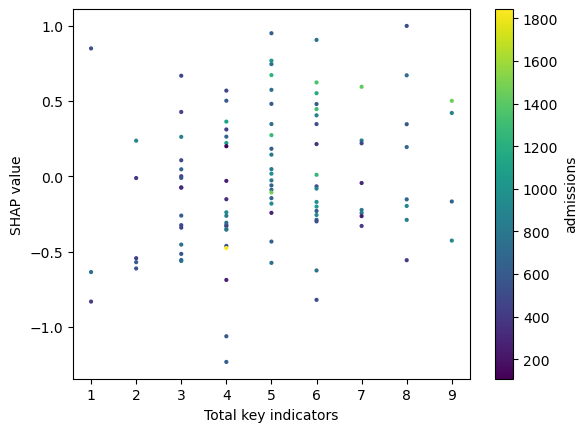

In [14]:
fig, ax = plt.subplots()

sca = ax.scatter(x, y, c=c, s=4)
plt.colorbar(sca, label='admissions')

ax.set_xlabel('Total key indicators')
ax.set_ylabel('SHAP value')

plt.savefig('./images/scatter_ki_shap.png', bbox_inches='tight')
plt.show()

## Admissions vs separate key indicators

In [15]:
cols_ki = [f'ki{i}' for i in range(1, 11)]

In [16]:
ki_group_names = [
    'KI1: nurses per bed',
    'KI2: psychologist',
    'KI3: stroke nurses',
    'KI4: Minimum number of nurses',
    'KI5: therapy availability',
    'KI6: pre-alerts',
    'KI7: early supported discharge',
    'KI8: patient and carer survey',
    'KI9: brain imaging type',
    'KI10: leadership'
]

In [17]:
df = df.dropna()

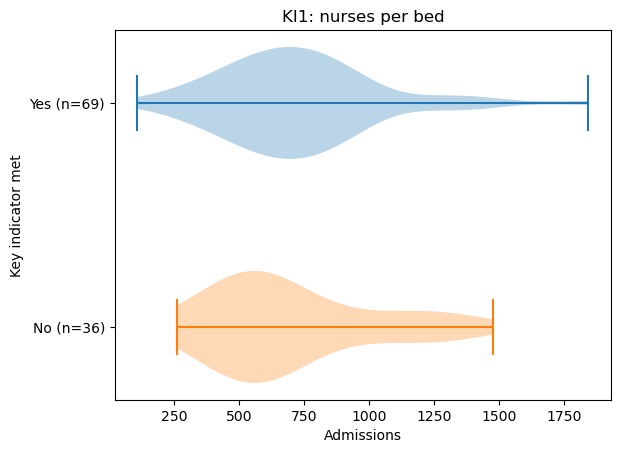

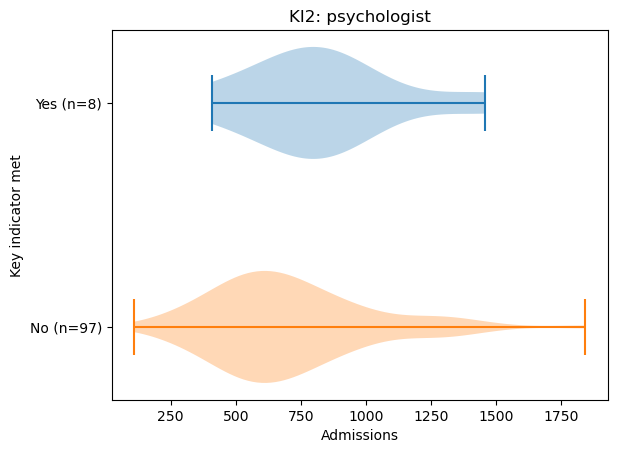

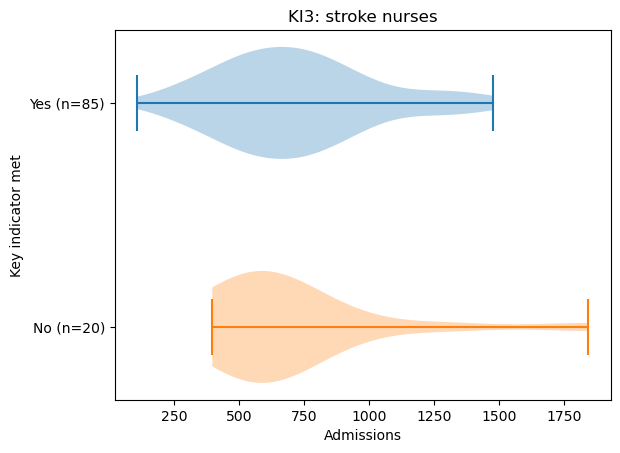

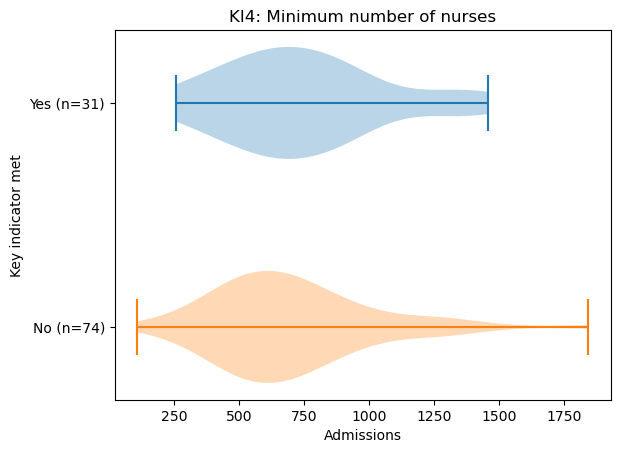

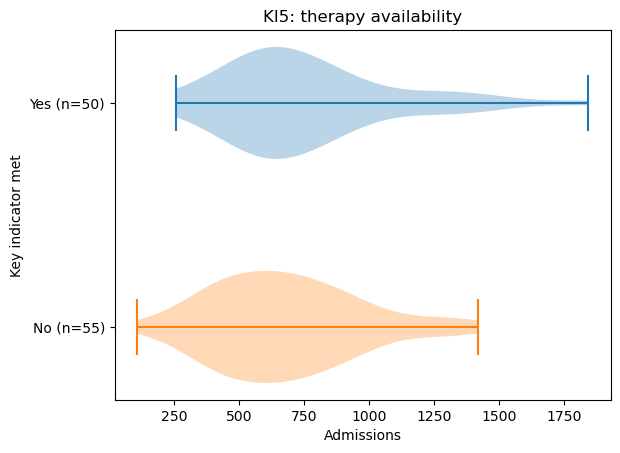

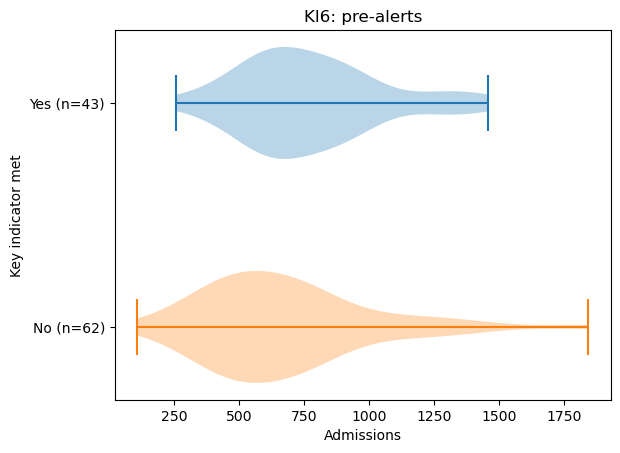

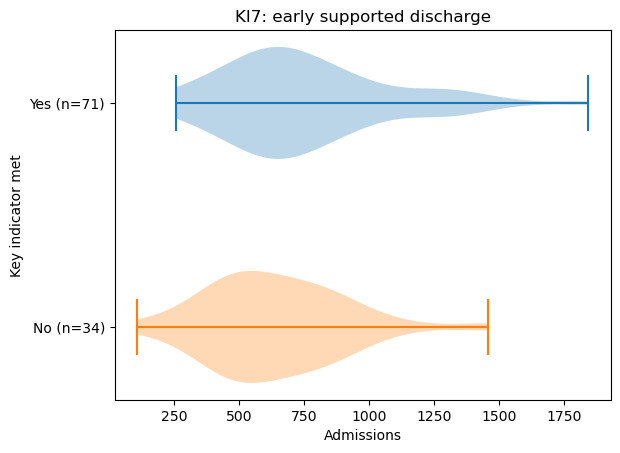

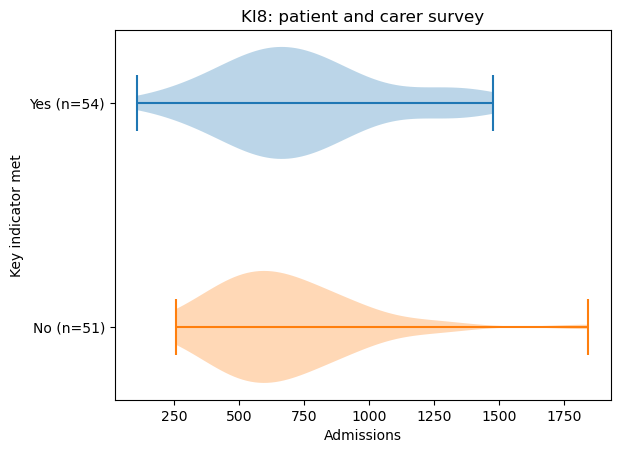

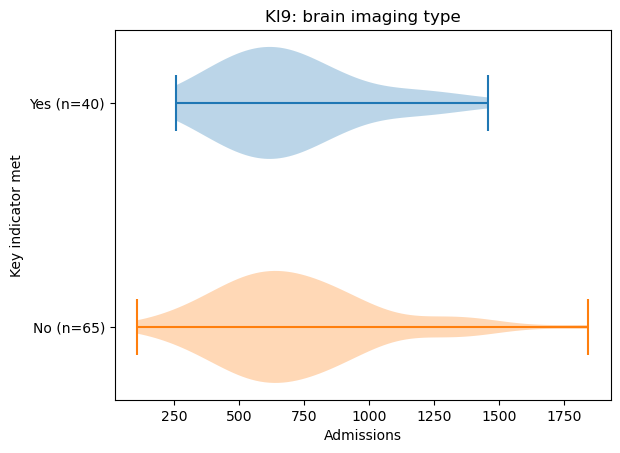

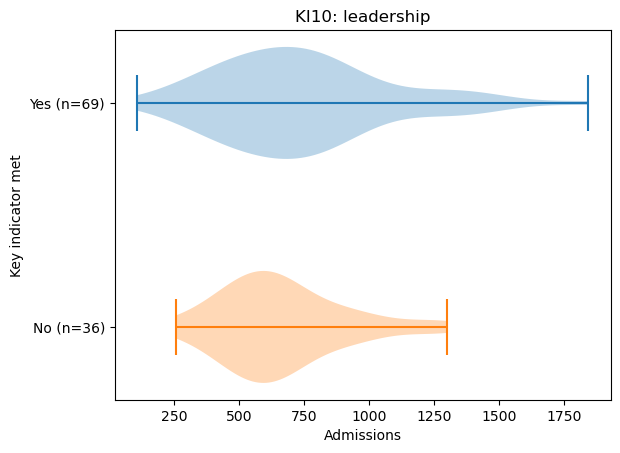

In [18]:
for c, col in enumerate(cols_ki):
    fig, ax = plt.subplots()

    x = df['admissions'].values
    y = df[col].values

    mask = y == 1
    n_yes = len(x[mask])
    n_no = len(x[~mask])
    
    ax.violinplot(x[mask], positions=[1], vert=False)
    ax.violinplot(x[~mask], positions=[0], vert=False)
    
    ax.set_ylabel('Key indicator met')
    ax.set_xlabel('Admissions')
    ax.set_title(ki_group_names[c])

    ax.set_yticks([0, 1])
    ax.set_yticklabels([f'No (n={n_no})', f'Yes (n={n_yes})'])
    
    plt.savefig(f'./images/violin_admissions_{col}.png', bbox_inches='tight')
    plt.show()